## Comparing Clusters with Compact Objects: With and Without Companions

In testing the addition of substellar objects into SPISEA, we have come across a curious problem. When generating a cluster with an IMFR and allowing for companions, we end up creating substellar mass compact objects, which does not make much sense. This is happening before modification of the code to specify brown dwarves as their own phase.

#### Importing the Necessary Packages:

In [20]:
# Import necessary packages. 
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

### Cluster 1: Without Companions

In [16]:
# Create isochrone object  
filt_list = ['wfc3,ir,f153m'] # We won't be doing much with synthetic photometry here, so only 1 filter
my_ifmr = ifmr.IFMR_Raithel18()
my_iso = synthetic.IsochronePhot(8, 0, 10,
                                 evo_model = evolution.MergedBaraffePisaEkstromParsec(),
                                      filters=filt_list)

In [17]:
# Create IMF objects                                                                                                                                                     
k_imf = imf.Weidner_Kroupa_2004()

In [18]:
# Make cluster
cluster_mass = 10**6
k_cluster = synthetic.ResolvedCluster(my_iso, k_imf, cluster_mass, ifmr=my_ifmr)

# Get outputs
k_out = k_cluster.star_systems

Found 908186 stars out of mass range


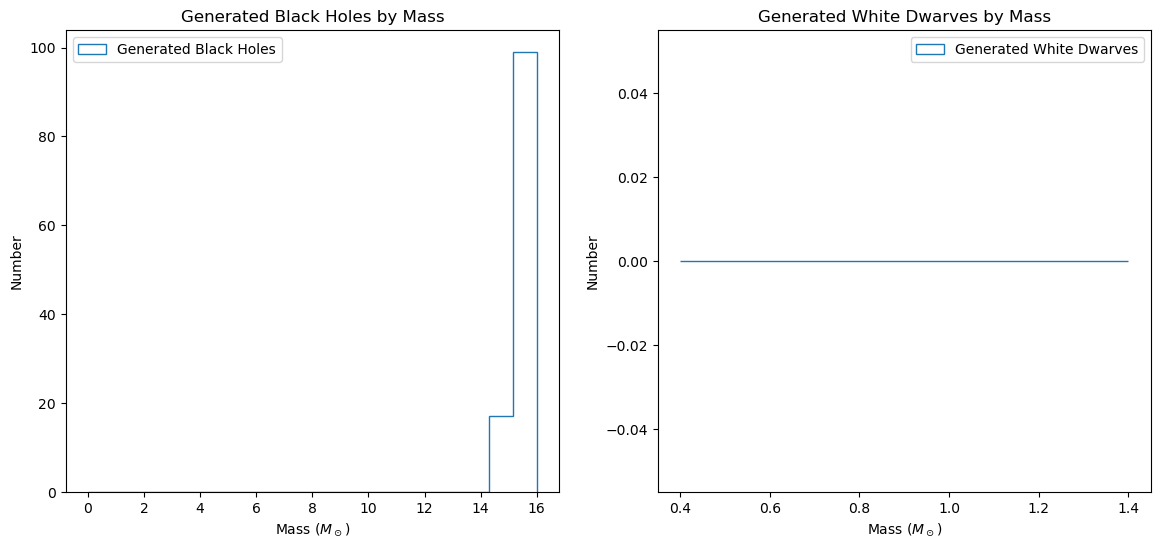

In [21]:
# Locate BHs, NSs and WDs
p_bh = np.where(k_out['phase'] == 103)[0]
p_ns = np.where(k_out['phase'] == 102)[0]
p_wd = np.where(k_out['phase'] == 101)[0]

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 1.4, 16)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(k_out[p_bh]['mass'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(k_out[p_wd]['mass'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

In [7]:
# Finding the minimum mass of a generated object
print("Smallest mass of a generated object: " + str(np.min(k_out['mass'])))

Smallest mass of a generated object: 0.07000011975637106


In [9]:
# Finding the minimum/maximum inital mass of generated black holes
print("Initial mass of smallest generated black hole: " + str(np.min(k_out[p_bh]['mass'])))
print("Initial mass of largest generated black hole: " + str(np.max(k_out[p_bh]['mass'])))

Initial mass of smallest generated black hole: 15.014691323167467
Initial mass of largest generated black hole: 119.74791889840289


This cluster fits the expectation from imfr.py that black holes are between 15-120 solar masses and white dwarves are at least 0.5 solar masses, even with the addition of substellar primary objects. 

### Cluster 2: With Companions

For this cluster we are using the same isochrone as Cluster 1, just changing our IMF to allow for systems with companions.

In [2]:
# Create IMF objects                                                                                                                                                     
imf_multi = multiplicity.MultiplicityUnresolved()
kc_imf = imf.Weidner_Kroupa_2004(multiplicity=imf_multi)

In [5]:
# Make cluster
cluster_mass = 10**6
kc_cluster = synthetic.ResolvedCluster(my_iso, kc_imf, cluster_mass, ifmr=my_ifmr)

# Get outputs
kc_out = kc_cluster.star_systems
kc_comp = kc_cluster.companions

Found 690569 stars out of mass range
Found 135191 companions out of stellar mass range


In [6]:
print(kc_comp['mass'], kc_comp['Teff'])

        mass        
--------------------
 0.18808616996721866
0.016007058623676886
 0.18392056165672846
0.015105203133808686
  1.0282818358508474
 0.21083846100118134
 0.14199672005929817
                 ...
   0.048264534414347
 0.09147624878262055
  1.1197916658217713
  0.1964383346903446
  0.1980378944762514
  0.3608681652858361
0.025696120026630187
Length = 393024 rows        Teff       
------------------
3238.9711755793223
               nan
 3227.457841740429
               nan
 5829.407699425202
 3286.658840436513
 3110.820131229178
               ...
               nan
 2950.023070827086
 6118.272466541432
3262.0557417620357
3266.4767685215697
3482.0151466756533
               nan
Length = 393024 rows


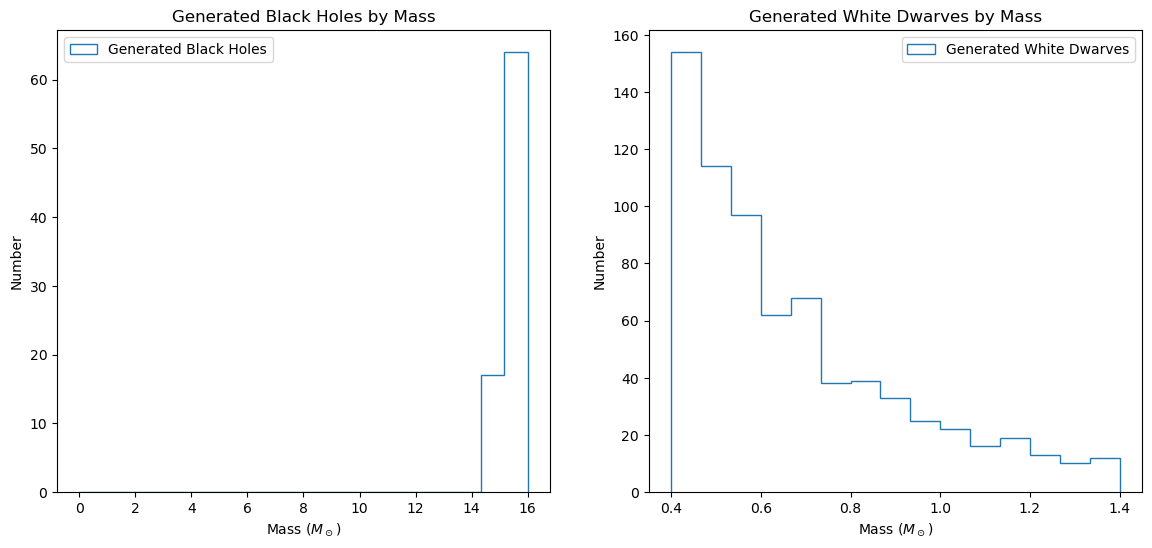

In [23]:
# Locate BHs, NSs and WDs
p2_bh = np.where(kc_out['phase'] == 103)[0]
c_bh = np.where(kc_comp['phase'] == 103)[0]
k_bh = np.concatenate([p2_bh, c_bh])
p2_ns = np.where(kc_out['phase'] == 102)[0]
c_ns = np.where(kc_comp['phase'] == 102)[0]
k_ns = np.concatenate([p2_ns, c_ns])
p2_wd = np.where(kc_out['phase'] == 101)[0]
c_wd = np.where(kc_comp['phase'] == 101)[0]
k_wd = np.concatenate([p2_wd, c_wd])

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 1.4, 16)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(kc_out[p2_bh]['mass'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(kc_out[k_wd]['mass'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

In [24]:
# Finding the minimum mass of generated black holes
print("Smallest mass of a primary generated black hole: " + str(np.min(kc_out[p2_bh]['mass'])))
print("Smallest mass of a companion generated black hole: " + str(np.min(kc_out[c_bh]['mass'])))

Smallest mass of a primary generated black hole: 15.003127309066931
Smallest mass of a companion generated black hole: 0.07035468449081322


In [8]:
# Finding the minimum mass of generated objects
print("Smallest mass of a primary generated object: " + str(np.min(kc_out['mass'])))
print("Smallest mass of a companion generated object: " + str(np.min(kc_comp['mass'])))

Smallest mass of a primary generated object: 0.07000003012576093
Smallest mass of a companion generated object: 0.010000040848729129


In [9]:
# Finding the minimum/maximum inital masses of generated black holes
print("Initial mass of smallest generated black hole: " + str(np.min(kc_out[k_bh]['mass'])))
print("Initial mass of largest generated black hole: " + str(np.max(kc_out[k_bh]['mass'])))

Initial mass of smallest generated black hole: 0.07035468449081322
Initial mass of largest generated black hole: 118.59389207250989


These statements show us that there is an issue with substellar-mass companions being erroneously identified as black holes and other compact remnants, but the issue does not extend to primary mass objects. Thus, we must introduce a bugfix to filter out this error.

In [10]:
# Create IMF objects                                                                                                                                                     
imf_multi_resolved = multiplicity.MultiplicityResolvedDK()
c3_imf = imf.Weidner_Kroupa_2004(multiplicity=imf_multi_resolved)

In [11]:
# Make cluster
cluster_mass = 10**6
cluster3 = synthetic.ResolvedCluster(my_iso, c3_imf, cluster_mass, ifmr=my_ifmr)

# Get outputs
c3_out = cluster3.star_systems
c3_comp = cluster3.companions

Found 689034 stars out of mass range
Found 135376 companions out of stellar mass range


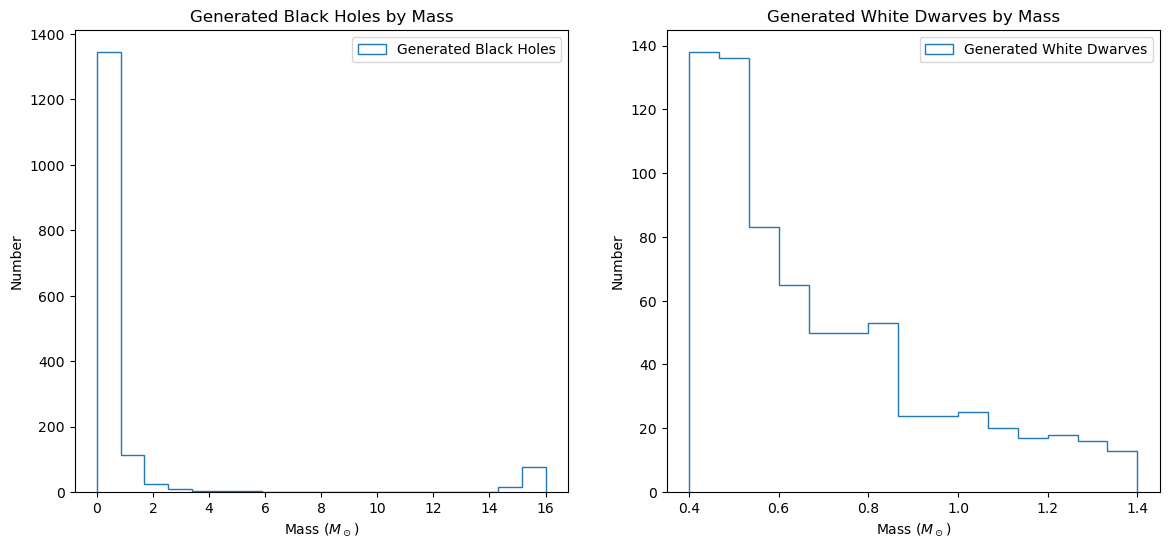

In [13]:
# Locate BHs, NSs and WDs
p3_bh = np.where(c3_out['phase'] == 103)[0]
c3_bh = np.where(c3_comp['phase'] == 103)[0]
k3_bh = np.concatenate([p3_bh, c3_bh])
p3_ns = np.where(c3_out['phase'] == 102)[0]
c3_ns = np.where(c3_comp['phase'] == 102)[0]
k3_ns = np.concatenate([p3_ns, c3_ns])
p3_wd = np.where(c3_out['phase'] == 101)[0]
c3_wd = np.where(c3_comp['phase'] == 101)[0]
k3_wd = np.concatenate([p3_wd, c3_wd])

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 1.4, 16)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(c3_out[k3_bh]['mass'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(c3_out[k3_wd]['mass'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

This is still the case when the companion objects are resolved.